<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

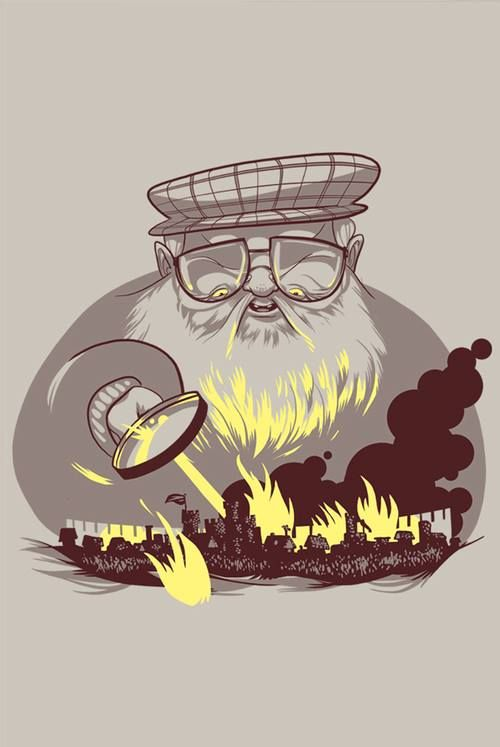

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 107MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.drop(columns=['mother', 'father',	'heir',	'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data['isPopular'] = data['popularity']
data.loc[data['isPopular'] >= 0.5, 'isPopular'] = 1
data.loc[data['isPopular'] < 0.5, 'isPopular'] = 0
data.drop(columns=['popularity'], inplace=True)

In [ ]:
data['boolDeadRelations'] = data['numDeadRelations']
data.loc[data['boolDeadRelations'] > 0, 'boolDeadRelations'] = 1
data.drop(columns=['numDeadRelations'], inplace=True)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
for key in cult.keys():
  data['culture'] = data['culture'].replace(cult[key], key)

In [ ]:
data.house.fillna('Homeless', inplace=True)

<ipython-input-167-01c2634acced>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.house.fillna('Homeless', inplace=True)


In [ ]:
house_value = data['house'].value_counts()
house = {}
rare=[]
seldom=[]
for key in house_value.keys():
  if house_value[key] <= 5:
    seldom.append(key)
  elif 5 < house_value[key] <= 15:
    rare.append(key)
  else:
    house[key] = key
house['Rare house'] = rare
house['Seldom house'] = seldom

In [ ]:
for key in house.keys():
  data['house'] = data['house'].replace(house[key], key)

In [ ]:
# Если в поле 'culture' лежит NaN, то заменяем на 'No culture'
data.culture.fillna('No culture', inplace=True)

<ipython-input-170-f1cdb8630fdd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.culture.fillna('No culture', inplace=True)


In [ ]:
culture_value = data['culture'].value_counts()
culture = {}
rare=[]
seldom=[]
popular=[]
for key in culture_value.keys():
  if culture_value[key] <= 3:
    seldom.append(key)
  elif 3 < culture_value[key] <= 8:
    rare.append(key)
  elif 8 < culture_value[key] <= 20:
    popular.append(key)
  else:
    culture[key] = key
culture['Rare culture'] = rare
culture['Seldom culture'] = seldom
culture['Popular culture'] = popular

In [ ]:
for key in culture.keys():
  data['culture'] = data['culture'].replace(culture[key], key)

In [ ]:
# Если в поле 'title' лежит NaN, то заменяем на 'Ordinary'
data.title.fillna('Ordinary', inplace=True)

<ipython-input-173-40bba432f71e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.title.fillna('Ordinary', inplace=True)


In [ ]:
title_value = data['title'].value_counts()
title = {}
rare=[]
seldom=[]
for key in title_value.keys():
  if title_value[key] <= 5:
    seldom.append(key)
  elif 5 < title_value[key] <= 10:
    rare.append(key)
  else:
    title[key] = key
title['Rare title'] = rare
title['Seldom title'] = seldom

In [ ]:
for key in title.keys():
  data['title'] = data['title'].replace(title[key], key)

In [ ]:
data['calculated_age'] = 305 - data['dateOfBirth']

In [ ]:
data['boolAge'] = data['age'] - data['calculated_age']

In [ ]:
data.loc[data['boolAge'] != 0, 'boolAge'] = -1
data.loc[data['boolAge'] == 0, 'boolAge'] = 1
data.loc[data['boolAge'] == -1, 'boolAge'] = 0
data.loc[data['age'].isna(), 'boolAge'] = 3

In [ ]:
data.drop(columns=['dateOfBirth', 'calculated_age'], inplace=True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=['name', 'age', 'isNoble'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

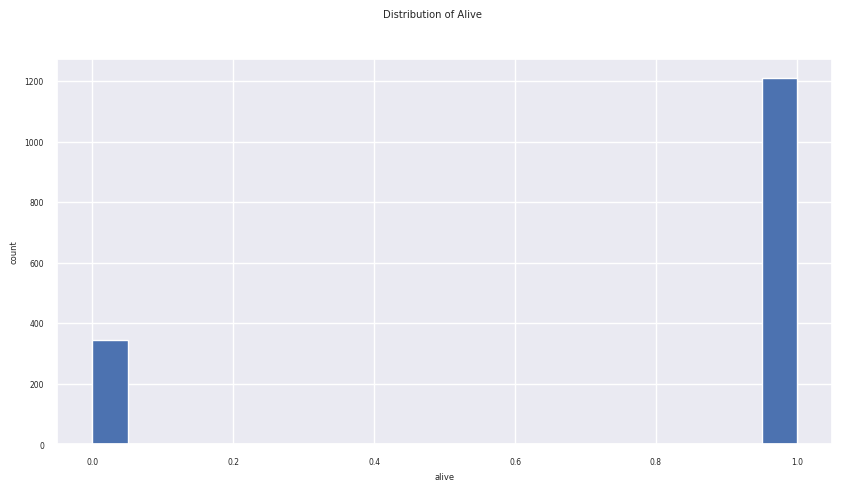

In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('alive')

plt.suptitle('Distribution of Alive')
plt.show()

Мы видим, что значения распределены не совсем ровно, датасет несбалансирован. Целевая переменная является качественными данными (то есть категориальной переменной).

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',\
       'book5', 'isMarried', 'isPopular', 'boolDeadRelations', 'boolAge']

In [ ]:
categorical_features = data[categorical_columns]

In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

In [ ]:
data_encoded = pd.concat([data, one_hot_data], axis=1)
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

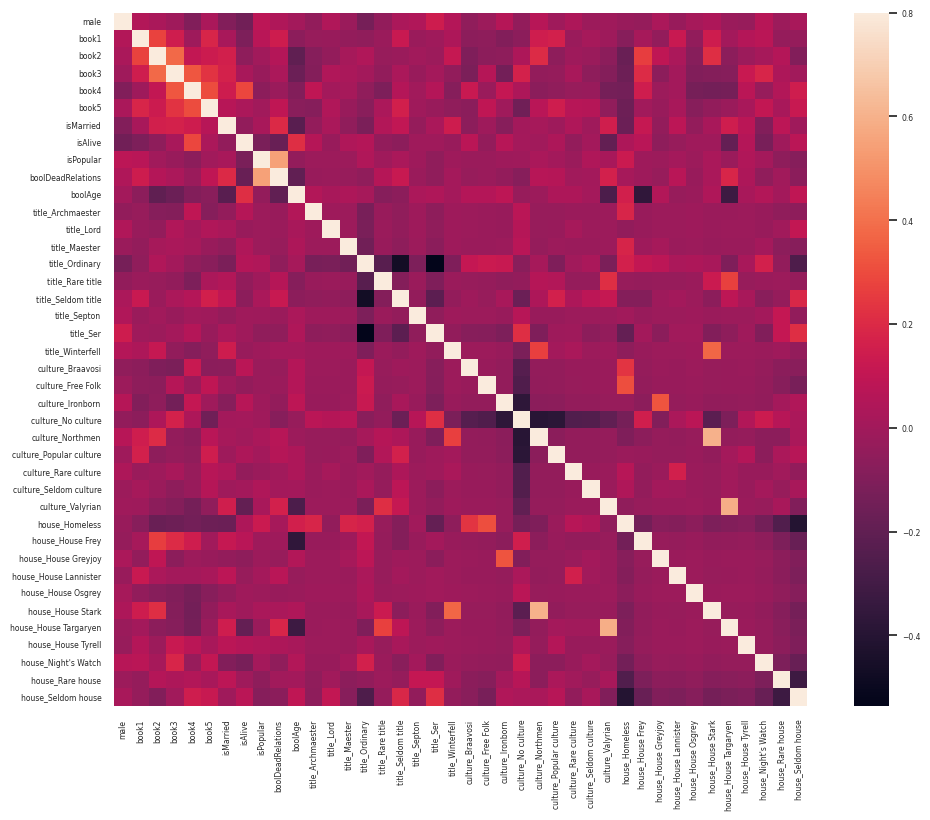

In [ ]:
corrmat = data_encoded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

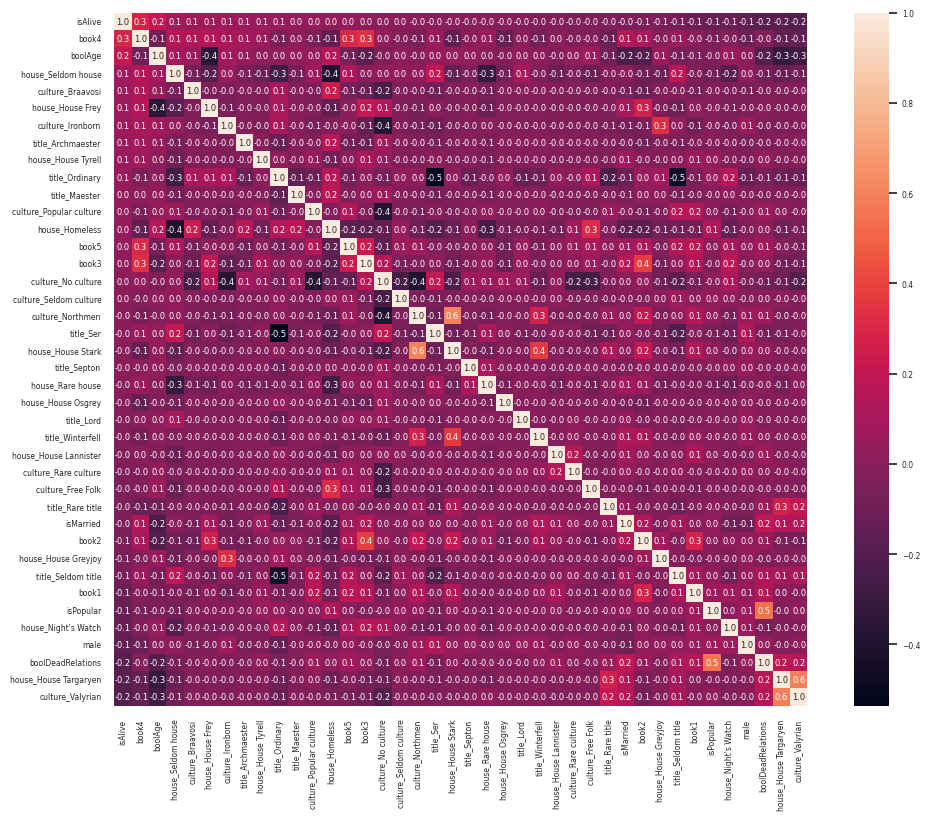

In [ ]:
# correlation matrix
k = 40 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_encoded[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=0.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

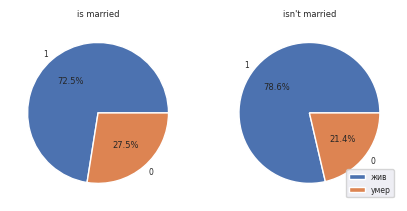

In [ ]:
# Готовим данные для графика
data1 = data[data['isMarried'] == 1]['isAlive'].value_counts()
data2 = data[data['isMarried'] == 0]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("is married")
ax2.set_title("isn't married")

plt.legend(['жив', 'умер'])

plt.show()

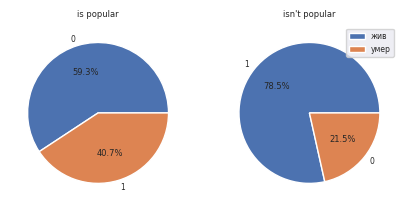

In [ ]:
# Готовим данные для графика
data1 = data[data['isPopular'] == 1]['isAlive'].value_counts()
data2 = data[data['isPopular'] == 0]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("is popular")
ax2.set_title("isn't popular")

plt.legend(['жив', 'умер'])

plt.show()

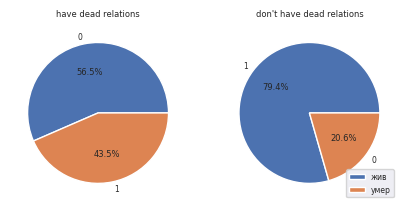

In [ ]:
# Готовим данные для графика
data1 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()
data2 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("have dead relations")
ax2.set_title("don't have dead relations")

plt.legend(['жив', 'умер'])

plt.show()

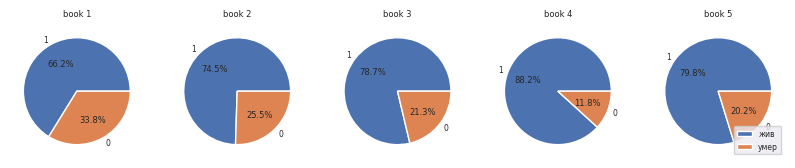

In [ ]:
# Готовим данные для графика
data1 = data[data['book1'] == 1]['isAlive'].value_counts()
data2 = data[data['book2'] == 1]['isAlive'].value_counts()
data3 = data[data['book3'] == 1]['isAlive'].value_counts()
data4 = data[data['book4'] == 1]['isAlive'].value_counts()
data5 = data[data['book5'] == 1]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10, 4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')

ax1.set_title("book 1")
ax2.set_title("book 2")
ax3.set_title("book 3")
ax4.set_title("book 4")
ax5.set_title("book 5")

plt.legend(['жив', 'умер'])

plt.show()

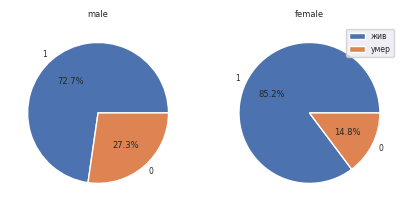

In [ ]:
# Готовим данные для графика
data1 = data[data['male'] == 1]['isAlive'].value_counts()
data2 = data[data['male'] == 0]['isAlive'].value_counts()
# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,4))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("male")
ax2.set_title("female")

plt.legend(['жив', 'умер'])

plt.show()

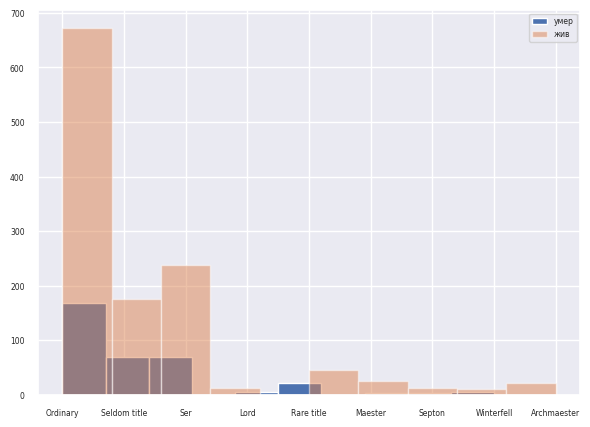

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(data['title'][data['isAlive'] == 0], alpha=1, label= 'умер')
plt.hist(data['title'][data['isAlive'] == 1], alpha=0.5, label= 'жив')

plt.legend()

plt.show()

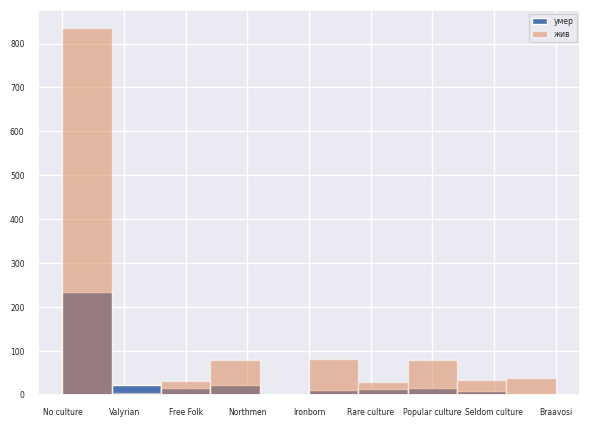

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(data['culture'][data['isAlive'] == 0], alpha=1, label= 'умер')
plt.hist(data['culture'][data['isAlive'] == 1], alpha=0.5, label= 'жив')

plt.legend()

plt.show()

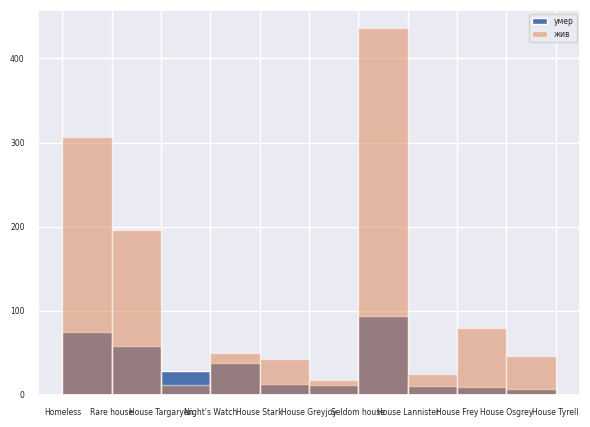

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(data['house'][data['isAlive'] == 0], alpha=1, label= 'умер')
plt.hist(data['house'][data['isAlive'] == 1], alpha=0.5, label= 'жив')

plt.legend()

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_encoded.drop(columns=['isAlive']).values
y = data_encoded['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

## Обработка тестовых данных


In [ ]:
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

In [ ]:
test.drop(columns=['mother', 'father',	'heir',	'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [ ]:
test['isPopular'] = test['popularity']
test.loc[test['isPopular'] >= 0.5, 'isPopular'] = 1
test.loc[test['isPopular'] < 0.5, 'isPopular'] = 0
test.drop(columns=['popularity'], inplace=True)

In [ ]:
test['boolDeadRelations'] = test['numDeadRelations']
test.loc[test['boolDeadRelations'] > 0, 'boolDeadRelations'] = 1
test.drop(columns=['numDeadRelations'], inplace=True)

In [ ]:
for key in cult.keys():
  test['culture'] = test['culture'].replace(cult[key], key)

In [ ]:
test.house.fillna('Homeless', inplace=True)

<ipython-input-205-388210859de5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.house.fillna('Homeless', inplace=True)


In [ ]:
for key in house.keys():
  test['house'] = test['house'].replace(house[key], key)

In [ ]:
house = test['house'].value_counts()
for key in house.keys():
  if house[key] <= 5:
    test['house'] = test['house'].replace(key, 'Seldom house')
  if 5 < house[key] <= 15:
    test['house'] = test['house'].replace(key, 'Rare house')

In [ ]:
test.culture.fillna('No culture', inplace=True)

<ipython-input-208-4aea3ae227d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.culture.fillna('No culture', inplace=True)


In [ ]:
for key in culture.keys():
  test['culture'] = test['culture'].replace(culture[key], key)

In [ ]:
culture = test['culture'].value_counts()
for key in culture.keys():
  if culture[key] <= 3:
    test['culture'] = test['culture'].replace(key, 'Seldom culture')
  if 3 < culture[key] <= 8:
    test['culture'] = test['culture'].replace(key, 'Rare culture')
  if 8 < culture[key] <= 20:
    test['culture'] = test['culture'].replace(key, 'Popular culture')

In [ ]:
test.title.fillna('Ordinary', inplace=True)

<ipython-input-211-b3ae2d823d8b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.title.fillna('Ordinary', inplace=True)


In [ ]:
for key in title.keys():
  test['title'] = test['title'].replace(title[key], key)

In [ ]:
title = test['title'].value_counts()
for key in title.keys():
  if title[key] <= 5:
    test['title'] = test['title'].replace(key, 'Seldom title')
  if 5 < title[key] <= 10:
    test['title'] = test['title'].replace(key, 'Rare title')

In [ ]:
test['calculated_age'] = 305 - test['dateOfBirth']
test['boolAge'] = test['age'] - test['calculated_age']

In [ ]:
test.loc[test['boolAge'] != 0, 'boolAge'] = -1
test.loc[test['boolAge'] == 0, 'boolAge'] = 1
test.loc[test['boolAge'] == -1, 'boolAge'] = 0
test.loc[test['age'].isna(), 'boolAge'] = 3

In [ ]:
test.drop(columns=['dateOfBirth', 'calculated_age'], inplace=True)
test.drop(columns=['name', 'age', 'isNoble'], inplace = True)

In [ ]:
one_hot_encoded_test = encoder.fit_transform(test[unprocessed_cat_features])
one_hot_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=test.index)

In [ ]:
test_encoded = pd.concat([test, one_hot_test], axis=1)
test_encoded = test_encoded.drop(unprocessed_cat_features, axis=1)

In [ ]:
list_1 = list(data_encoded.columns)
list_2 = list(test_encoded.columns)
diff = list(set(list_1).difference(list_2))

In [ ]:
for i in diff:
  test_encoded[i] = 0

In [ ]:
test_encoded.drop(columns=['isAlive'], inplace = True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

NameError: name 'X_train' is not defined

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_ada_boost = ada_boost.predict(X_test)


In [ ]:
rand_forest = RandomForestClassifier(random_state=42, max_depth=9, max_leaf_nodes=37)
rand_forest.fit(X_train, y_train)
y_rand_forest = rand_forest.predict(X_test)

In [ ]:
gaussian = GaussianProcessClassifier(random_state=42)
gaussian.fit(X_train, y_train)
y_gaussian = gaussian.predict(X_test)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_gaussian_nb = gaussian_nb.predict(X_test)

In [ ]:
k_neighbors = KNeighborsClassifier(p=2, n_neighbors=18, leaf_size=1)
k_neighbors.fit(X_train, y_train)
y_k_neighbors = k_neighbors.predict(X_test)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)

In [ ]:
tree = DecisionTreeClassifier(random_state=42, max_depth=4, max_leaf_nodes=7)
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_ada_boost)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8397


In [ ]:
accuracy = accuracy_score(y_test, y_rand_forest)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8558


In [ ]:
accuracy = accuracy_score(y_test, y_gaussian)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8558


In [ ]:
accuracy = accuracy_score(y_test, y_gaussian_nb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.4135


In [ ]:
accuracy = accuracy_score(y_test, y_k_neighbors)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8301


In [ ]:
accuracy = accuracy_score(y_test, y_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8429


In [ ]:
accuracy = accuracy_score(y_test, y_tree)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8429


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.4MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
data_encoded = data_encoded.reindex(sorted(data_encoded.columns), axis=1)
test_encoded = test_encoded.reindex(sorted(test_encoded.columns), axis=1)

In [ ]:
data_x = data_encoded.drop(columns=['isAlive'])
data_y = data_encoded['isAlive']
rand_forest = RandomForestClassifier(random_state=42, max_depth=9, max_leaf_nodes=37)
rand_forest.fit(data_x, data_y)
y_rand_forest = rand_forest.predict(test_encoded)

In [ ]:
submission['isAlive'] = y_rand_forest

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)